In [8]:
import numpy as np

class UCBPhimixing :
    """we create a new type of object called UCB1 with 
    Attributes:
    _ _ _ _ _ _  
    n_arms:int the number of arms"""
    def __init__(self, n_arms, norm_phi):
        self.n_arms = n_arms  # numbers of arms
        self.counts = np.zeros(n_arms) # for any arms we store  the number of time that it was played in this numpy table initialize by full zeros
        self.values = np.zeros(n_arms) # we also done that for store the average for all arms
        self.total_counts = 0 # for store the moment t step by step
        self.norm_phi = norm_phi
        self.xi = 1 + 8 * self.norm_phi
    def select_arm(self):

        """This methode return the maximum value of the upper bound cumullative"""
        if self.total_counts < self.n_arms:
            #chaque bras est joué une fois: c'est le tir initial
            return self.total_counts
        else:
            s = self.counts
            bonus = np.sqrt((8 * self.xi * (1 / 8 + np.log(t))) / (2 ** s)) + (self.norm_phi) / (2 ** (s - 1))
            UCB_values = self.values + bonus
            return np.argmax(UCB_values)   

    def update(self, chosen_arm, reward):
        """ this methode is used to update our algorithm it is an recursive methode
        intput:
                - chosen_arm : is the arm considered as chosen
                - reward is the reward ontained through the choise  of the  arm called chosen_arm  """

        self.counts[chosen_arm] += 1
        self.total_counts += 2** self.counts[chosen_arm]
        s_j = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = (2**(s_j-1)/2**s_j)*value + (1/2**s_j)*reward #  il s'agit de la mise a jour de la moyenne empirique
        self.values[chosen_arm] = new_value

In [11]:
import matplotlib.pyplot as plt

def reward_chosen_arm(arm):
    return np.random.binomial(1, means_arms[arm] )

#parameters
n_plays = 20000
n_sim = 1
means_arms = [ 1/3, 1/4 ]   

#matrice pour stoquer les regrets
regrets_mat  = []

#simulation
for sim in range( n_sim  ):
    algo_UCB = UCBPhimixing(n_arms= 2, norm_phi = 0.9)
    cumulative_reward = 0
    regrets = []
    for t in range( 1 , n_plays + 1):
        arm = algo_UCB.select_arm()
        reward = reward_chosen_arm(arm)
        cumulative_reward += reward 
        algo_UCB.update(arm, reward)
        regret = t * max(means_arms) - np.sum([algo_UCB.counts[i]*means_arms[i] for i in range(algo_UCB.n_arms)])
        print( regret)
        regrets.append( regret)
    
    regrets_mat.append(regrets)

# muyenne des regrets sur toutes simulations
regrets_plot = np.mean(regrets_mat, axis = 0)
regrets_plot

0.0
0.08333333333333337
0.08333333333333337
0.16666666666666674
0.16666666666666652
0.25
0.25
0.3333333333333335
0.3333333333333335
0.4166666666666665
0.4166666666666665
0.5
0.5
0.583333333333333
0.5833333333333339
0.666666666666667
0.6666666666666661
0.75
0.75
0.833333333333333
0.8333333333333339
0.916666666666667
0.9166666666666661
1.0
0.9999999999999991
1.083333333333333
1.083333333333334
1.166666666666666
1.166666666666666
1.25
1.25
1.333333333333334
1.333333333333334
1.416666666666666
1.416666666666666
1.5
1.5
1.583333333333334
1.583333333333334
1.666666666666666
1.666666666666666
1.75
1.75
1.833333333333334
1.833333333333334
1.916666666666666
1.916666666666666
2.0
2.0
2.083333333333332
2.083333333333334
2.166666666666666
2.1666666666666643
2.25
2.25
2.333333333333332
2.3333333333333357
2.416666666666668
2.4166666666666643
2.5
2.5
2.583333333333332
2.5833333333333357
2.666666666666668
2.6666666666666643
2.75
2.75
2.833333333333332
2.8333333333333357
2.916666666666668
2.91666666666

/tmp/ipykernel_1198744/2223159722.py:34: RuntimeWarning: overflow encountered in scalar add
  self.total_counts += 2** self.counts[chosen_arm]
/tmp/ipykernel_1198744/2223159722.py:34: RuntimeWarning: overflow encountered in scalar power
  self.total_counts += 2** self.counts[chosen_arm]
/tmp/ipykernel_1198744/2223159722.py:37: RuntimeWarning: overflow encountered in scalar power
  new_value = (2**(s_j-1)/2**s_j)*value + (1/2**s_j)*reward #  il s'agit de la mise a jour de la moyenne empirique
/tmp/ipykernel_1198744/2223159722.py:23: RuntimeWarning: overflow encountered in power
  bonus = np.sqrt((8 * self.xi * (1 / 8 + np.log(t))) / (2 ** s)) + (self.norm_phi) / (2 ** (s - 1))
/tmp/ipykernel_1198744/2223159722.py:37: RuntimeWarning: invalid value encountered in scalar divide
  new_value = (2**(s_j-1)/2**s_j)*value + (1/2**s_j)*reward #  il s'agit de la mise a jour de la moyenne empirique


array([0.00000000e+00, 8.33333333e-02, 8.33333333e-02, ...,
       8.53333333e+01, 8.53333333e+01, 8.53333333e+01], shape=(20000,))

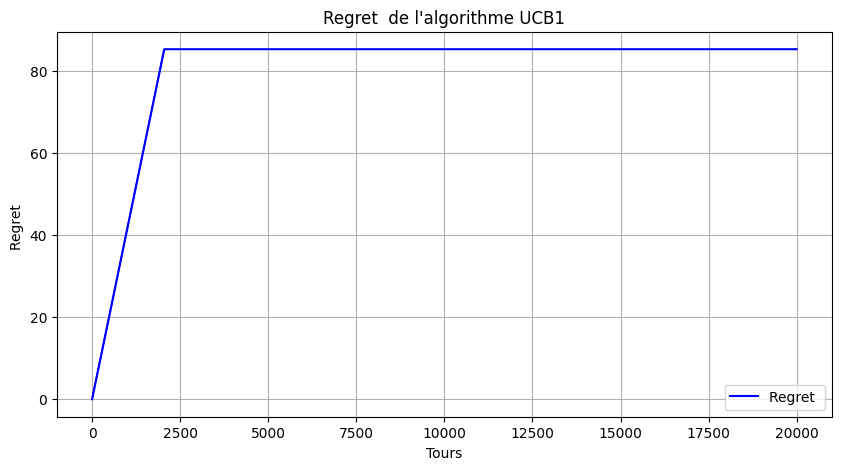

In [10]:
# Affichage : courbes de regret
plt.figure(figsize=(10,5))
plt.plot(regrets_plot, label="Regret ", color='blue')

plt.xlabel("Tours")
plt.legend()
plt.ylabel("Regret ")
plt.title("Regret  de l'algorithme UCB1")
plt.grid(True)
plt.show()

In [ ]:
class UCB_Restless:

    def __init__( self, arms, norm_phi):
        self.arms = arms
        self.n_arms = n_arms
        self.norm_phi = norm_phi
        self.counts = [ 0 for i in range(self.n_arms)]
        self.t = 1 
        self.emp_means = [[0] for i in range(self.n_arms)]
        self.stationary_means =  [ stationary_mean( arm.states, arm.mat) for arm in self.arms]
        self.UCB_lists = [[] for _ in range( self.n_arms)]


    def select_arm(self, counts, emp_means, t):
        xi = 1 + 8 * self.norm_phi
        s = self.counts
        
        ucb = [self.emp_means[i] + np.sqrt((8 * self.xi * (1 / 8 + np.log(t))) / (2 ** s[i])) + (self.norm_phi) / (2 ** (s[i] - 1)) for i in range(self.n_arms)]
        for arm_ind in range( self.n_arms):
            self.UCB_lists[arm_ind].append(ucb[arm_ind])
        return ucb.index(max(ucb))

    def update( self, chosen_arm, counts, t, reward_batch, n_rounds ):
        s_j = counts[chosen_arm]

        emp_mean  = 1/2**s_j * sum([reward_batch[chosen_arm][t_prime] for t_prime in range(t,min(t+2**s_j,n_rounds))])
        counts[chosen_arm] += 1
        t += 2**s_j
        return emp_mean, counts, t

    def definition_reward_batch ( self, reward_functions):
        for arm in range ( self.arms):
            reward = reward_functions[ arms ]
            reward_batch.append( [reward])
        return reward_batch

    

                

        
        

In [ ]:
def reward_function(arm):
    return np.random.binomial( 1, means_arms[arm])
n_arms = 2
n_round = 20000
means_arms = [0.3,0.5]

rewards = []

regret = []
expected_score = 0
best_score = 0
sum_reward_arm = [[] for i in range (n_arms)]
arm_chosen = []

algoucb = UCB_Restless(arms = [0, 1], norm_phi = 0.9)
reward_batch = algoucb.definition_reward_batch([reward_function]*2)

for i in range(n_arms):
    arm_chosen.append(i)
    algoucb.emp_means[i].append(reward_batch[i][i])
    algoucb.counts[i] += 1
    




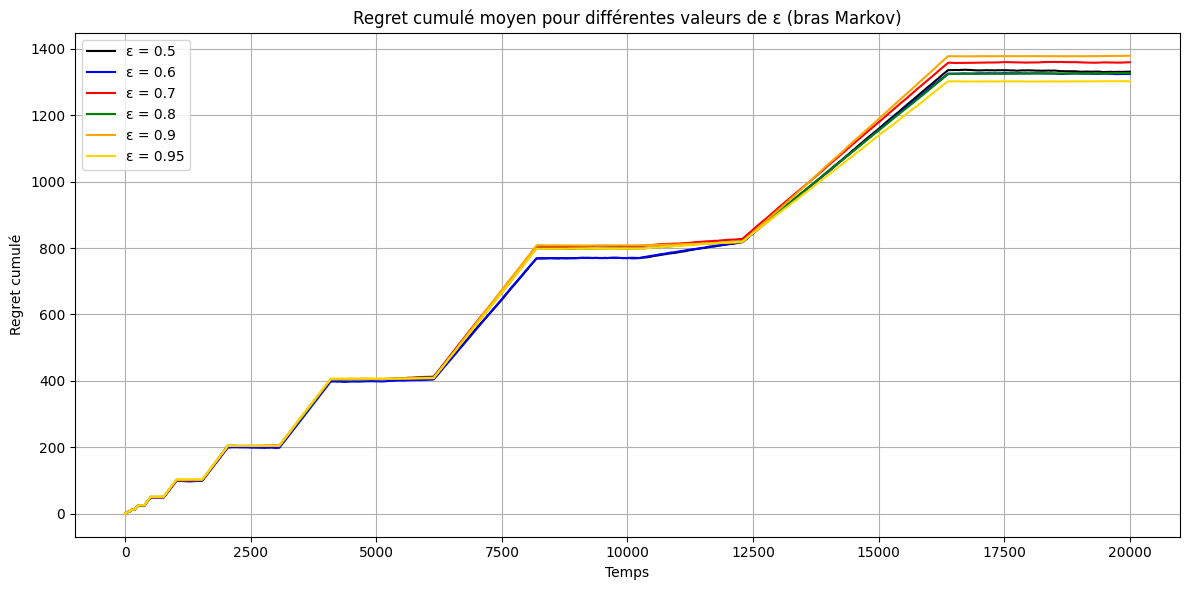

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Chaine de Markov binaire
class MarkovArm:
    def __init__(self, transition_matrix, initial_state=0):
        self.P = transition_matrix
        self.state = initial_state

    def __call__(self):
        current_state = self.state
        self.state = np.random.choice([0, 1], p=self.P[current_state])
        return current_state  # correction ici

# UCB pour phi-mixing (repris depuis ton code précédent)
class PhiMixingUCB:
    def __init__(self, k, phi_sum, T):
        self.k = k
        self.phi_sum = phi_sum
        self.T = T
        self.X = np.zeros(k)
        self.s = np.ones(k, dtype=int)
        self.arm_counts = np.ones(k)

    def run(self, arms):
        t = 0
        rewards = []

        for i in range(self.k):
            reward = arms[i]()
            self.X[i] = reward
            rewards.append(reward)
            t += 1

        while t < self.T:
            ucb_values = self.X + np.sqrt(8 * (1 + 8 * self.phi_sum) * (0.125 + np.log(t + 1)) / (2 * self.s)) \
                         + (self.phi_sum / (2 * self.s - 1))
            j = np.argmax(ucb_values)

            batch_size = 2 ** self.s[j]
            actual_batch = min(batch_size, self.T - t)
            rewards_batch = [arms[j]() for _ in range(actual_batch)]
            mean_reward = np.mean(rewards_batch)

            self.X[j] = mean_reward
            self.s[j] += 1
            self.arm_counts[j] += actual_batch
            rewards.extend(rewards_batch)
            t += actual_batch

        return np.array(rewards)

# Paramètres
following_eps = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
colors = ["black", "blue", "red", "green", "orange", "gold"]
k = 2
T = 20000
n_sim = 100
norm_phi = 0.9
arm_probs = [0.3, 0.5]
best_mean = max(arm_probs)

plt.figure(figsize=(12, 6))

for idx, eps in enumerate(following_eps):
    transition_matrix = [[1 - eps, eps],
                         [eps, 1 - eps]]

    # Deux bras : un bras Bernoulli, un bras Markov
    regrets_mat = []
    for sim in range(n_sim):
        arms = [
            lambda p=arm_probs[0]: np.random.binomial(1, p),
            MarkovArm(transition_matrix, initial_state=0)
        ]

        ucb_agent = PhiMixingUCB(k=k, phi_sum=norm_phi, T=T)
        rewards = ucb_agent.run(arms)

        cumulative_rewards = np.cumsum(rewards)
        optimal_cumulative = np.arange(1, T + 1) * best_mean
        regret = optimal_cumulative - cumulative_rewards
        regrets_mat.append(regret)

    # Moyenne des regrets sur les simulations
    regret_plt = np.mean(regrets_mat, axis=0)
    plt.plot(regret_plt, label=f"ε = {eps}", color=colors[idx])

plt.title("Regret cumulé moyen pour différentes valeurs de ε (bras Markov)")
plt.xlabel("Temps")
plt.ylabel("Regret cumulé")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
